# TEAM AMSTERDAM

# SEPSIS_ANALYSIS_FAST_API

## Exploring Patterns and Predictors in Patient Data

Understanding healthcare data is complex and very important dynamics behind the occurrence of life-threatening conditions.  
Sepsis is a serious condition resulting from the presence of harmful microorganism in the blood or other tissues and the body's response to their presence, potentially leading to the malfunctioning of various organs, shock and death.

Sepsis is a potentially fatal condition resulting from the body's extreme response to an infection, remains a major challenge for healthcare providers worldwide. 

Understanding these dataset and revealing secrets of sepsis occurrence can lead to improved early detection, timely interventions, and ultimately, better patient outcomes.

This project aims to explore into the vast pool of patient data, harnessing the power of data analysis and machine learning, to explore patterns and predictors associated with sepsis occurrence. 


# Hypothesis 1

 - Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

- Null Hypothesis: There is no association between higher plasma glucose levels (PRG) and the risk of developing sepsis.

- Alternate Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.


# Hypothesis 2 

- Patients without valid insurance cards are more likely to develop sepsis.

- Null Hypothesis: There is no association between the absence of valid insurance cards and the likelihood of developing sepsis.

- Alternate Hypothesis: Patients without valid insurance cards are more likely to develop sepsis.

# DATASET DESCRIPTION

The data set is sourced from kaggle 

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

# Setup

# Libraries and Packages 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

import plotly.express as px
from matplotlib import pyplot  as plt
import matplotlib.ticker as mtick  


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew

# Data Splitting and Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

import pickle

# Saving Model
from joblib import dump

# Others
#import shap

from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

# Data set Importation

In [2]:
#loading both the train and test dataset
sepsis_train=pd.read_csv("Paitients_Files_Train.csv")
sepsis_test=pd.read_csv("Paitients_Files_Test.csv")

In [3]:
sepsis_train.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [4]:
sepsis_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
#Check dataset dimension 
print("Number of rows for Train data:", sepsis_train.shape[0])
print("Number of columns for Train data:", sepsis_train.shape[1])

Number of rows for Train data: 599
Number of columns for Train data: 11


In [6]:
#Check dataset dimension 
print("Number of rows for Test Data:", sepsis_test.shape[0])
print("Number of columns for Test Data:", sepsis_train.shape[1])

Number of rows for Test Data: 169
Number of columns for Test Data: 11


In [7]:
#Explore the summary statistics of numerical columns:
sepsis_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


###### PRG

- Count: 599
- Mean: 3.82
- Standard Deviation: 3.36
- Range: 0 to 17

###### PL

- Count: 599
- Mean: 120.15
- Standard Deviation: 32.68
- Range: 0 to 198

###### PR

- Count: 599
- Mean: 68.73
- Standard Deviation: 19.34
- Range: 0 to 122

###### SK

- Count: 599
- Mean: 20.56
- Standard Deviation: 16.02
- Range: 0 to 99

###### TS

- Count: 599
- Mean: 79.46
- Standard Deviation: 116.58
- Range: 0 to 846

###### M11

- Count: 599
- Mean: 31.92
- Standard Deviation: 8.01
- Range: 0 to 67.1

###### BD2

- Count: 599
- Mean: 0.48
- Standard Deviation: 0.34
- Range: 0.078 to 2.42

###### Age

- Count: 599
- Mean: 33.29
- Standard Deviation: 11.83
- Range: 21 to 81

###### Insurance

- Count: 599
- Proportion with Insurance: 0.686 (68.6%)

sepsis_train.info()

In [8]:
sepsis_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
sepsis_train.isnull().count()

ID           599
PRG          599
PL           599
PR           599
SK           599
TS           599
M11          599
BD2          599
Age          599
Insurance    599
Sepssis      599
dtype: int64

In [10]:
#Explore the summary statistics of numerical columns:
sepsis_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


In [11]:
sepsis_train.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [12]:
df= sepsis_train.copy()

# Exploratory Data Analysis

## Univariate Analysis

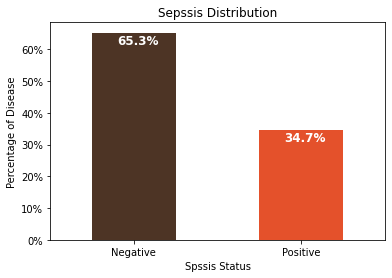

In [13]:
colors = ['#4D3425','#E4512B']
ax = (sepsis_train['Sepssis'].value_counts()*100.0 /len(sepsis_train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_xlabel('Spssis Status')
ax.set_ylabel('Percentage of Disease')
ax.set_title('Sepssis Distribution')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Add small note please, for explanation

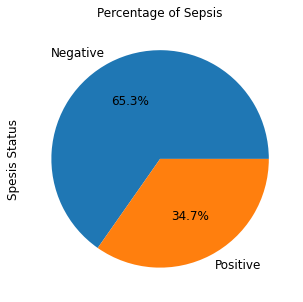

In [14]:
ax = (sepsis_train['Sepssis'].value_counts()*100.0 /len(sepsis_train))\
.plot.pie(autopct='%.1f%%', labels = ['Negative', 'Positive'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Spesis Status',fontsize = 12)
ax.set_title('Percentage of Sepsis', fontsize = 12)

plt.show()

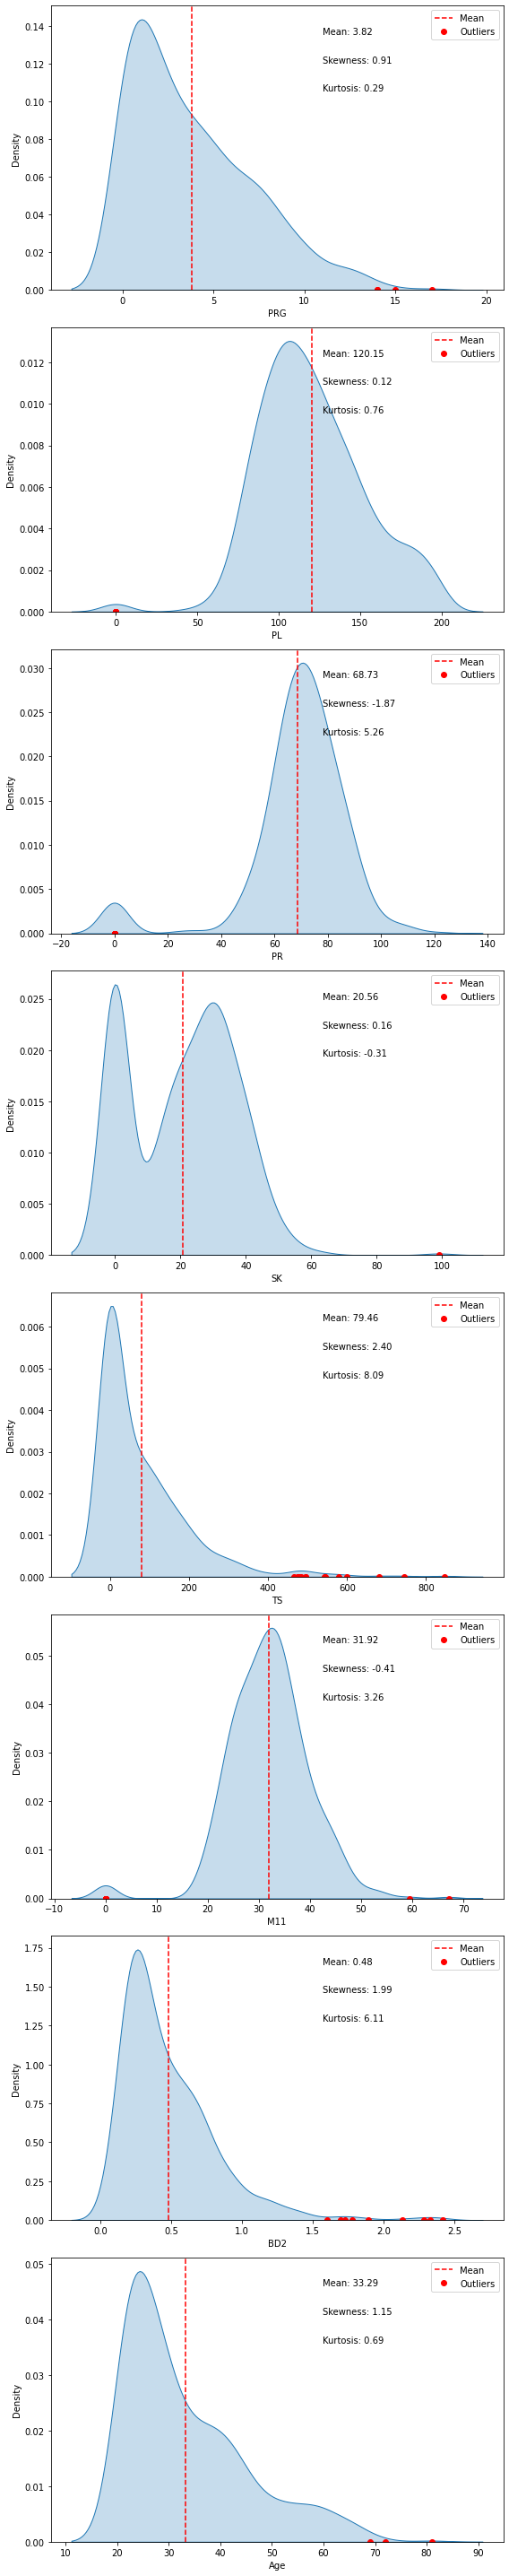

In [15]:
# Select columns to plot
cols_to_plot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(8, 40))
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


Based on the KDE plot analysis of the PRG variable, it appears that the distribution is positively skewed, suggesting the presence of some higher values. The distribution is also platykurtic, indicating a flatter peak and lighter tails compared to a normal distribution.

Based on the KDE plot analysis of the PL variable, it appears that the distribution is approximately symmetric, with a mean value of 120.15. The distribution is mesokurtic, suggesting a similar shape to a normal distribution.

The kde plot suggests that the blood pressure distribution is negatively skewed and has a more peaked shape with possible outliers.

The kde plot suggests that the distribution of blood work result 2 is slightly positively skewed and has a flatter shape.This suggests that the distribution has fewer outliers or extreme values.

The kde plot suggests that the distribution of TS (blood work result 3) is positively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the right, indicating a higher frequency of lower values compared to higher values.This suggests that the distribution has more outliers or extreme values.

The kde plot suggests that the distribution of body mass index is slightly negatively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the left, indicating a higher frequency of higher values compared to lower values. This suggests that the distribution has more outliers or extreme values.
The kde plot indicates a positively skewed distribution for the blood work result with a more peaked shape and heavier tails.This indicates a higher frequency of extreme values or outliers.This means that the tail of the distribution is extended to the right, suggesting a higher frequency of lower values compared to higher values.

The kde plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals. This indicates a more uniform spread of values without significant outliers or extreme values.This suggests that the tail of the distribution is extended to the right, indicating a higher frequency of younger individuals compared to older individuals.

# Outliers

Number of outliers in PRG: 4


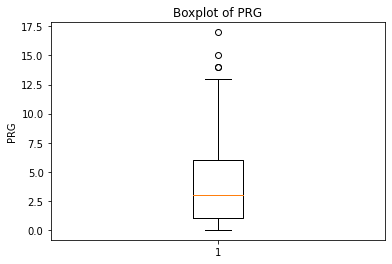

Number of outliers in PL: 0


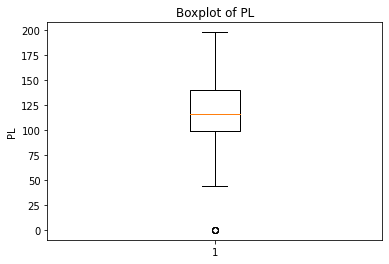

Number of outliers in PR: 6


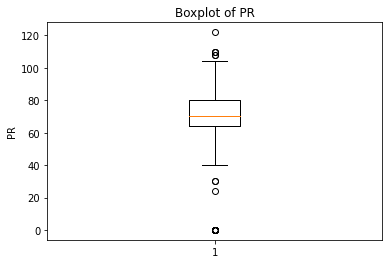

Number of outliers in SK: 1


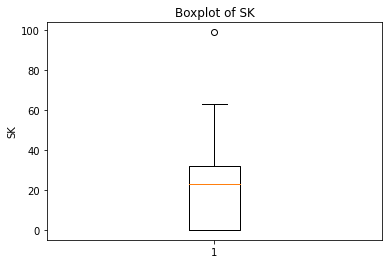

Number of outliers in TS: 28


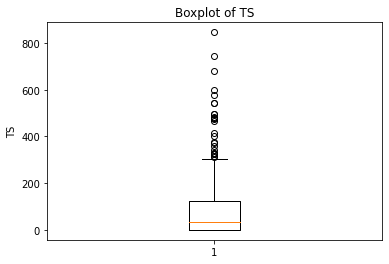

Number of outliers in M11: 7


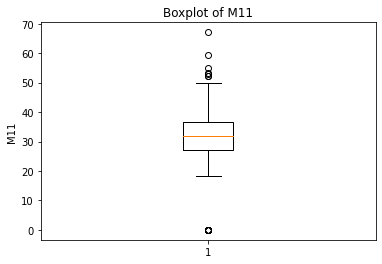

Number of outliers in BD2: 19


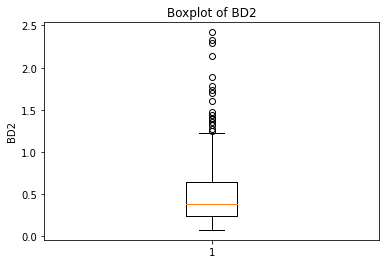

Number of outliers in Age: 12


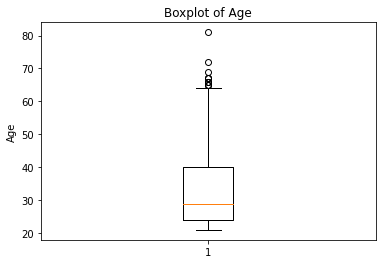

Number of outliers in Insurance: 0


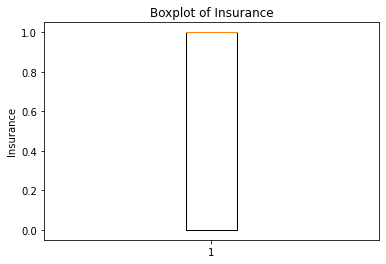

In [16]:
# Select numerical columns
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Iterate over each numerical column
for col in numerical_cols:
    # Create a box plot
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Get the outliers
    outliers = df[df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))]  # Adjust the outlier threshold if needed

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in {col}: {num_outliers}")

    # Show the plot
    plt.show()


In [46]:
#for col in sepsis_train.drop(columns=["ID","Sepssis","Insurance"]).columns:
    #graph=px.box(sepsis_train,x="Sepssis",y=col)
    #graph.show()

# Bivariate Analysis

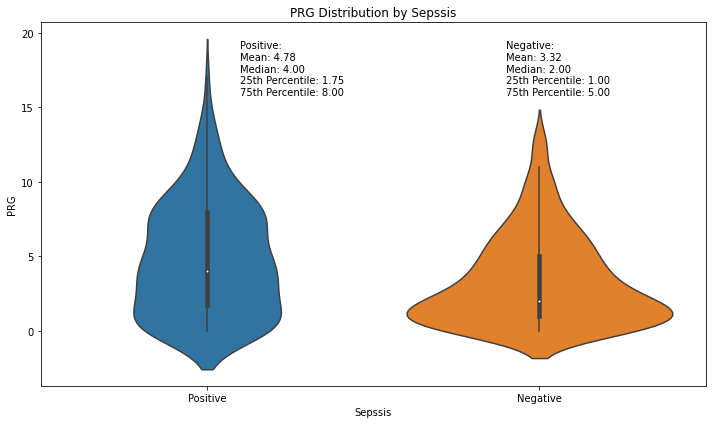

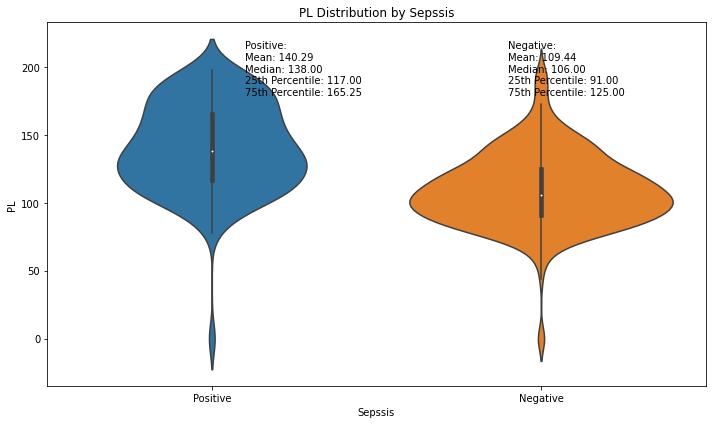

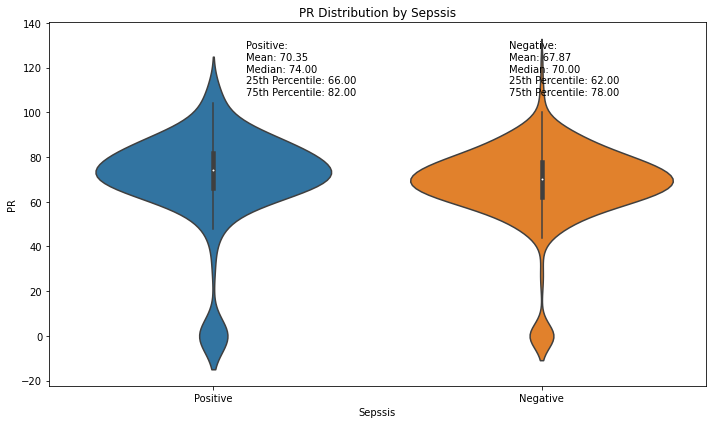

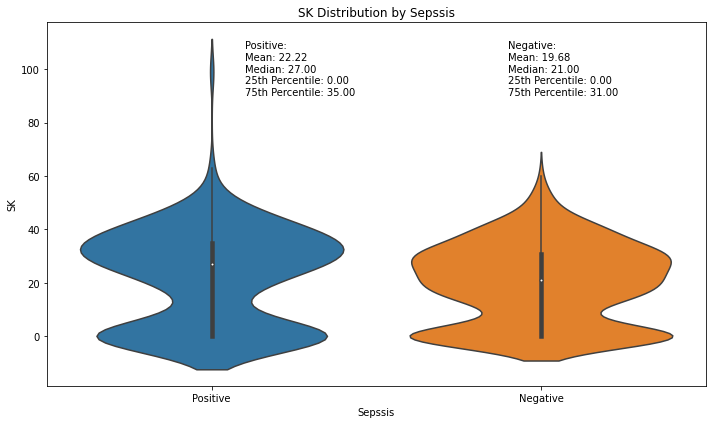

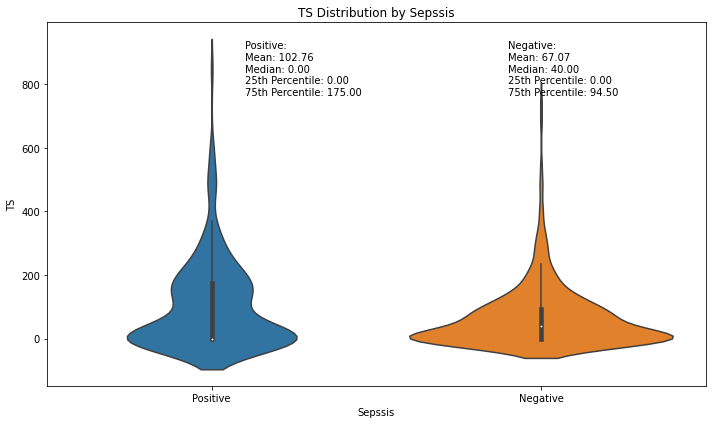

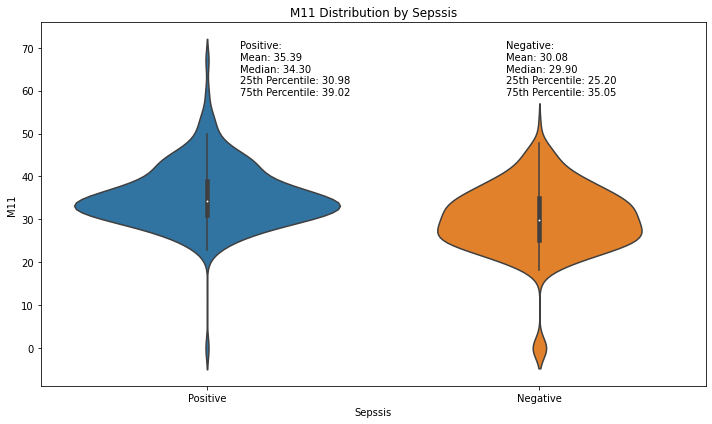

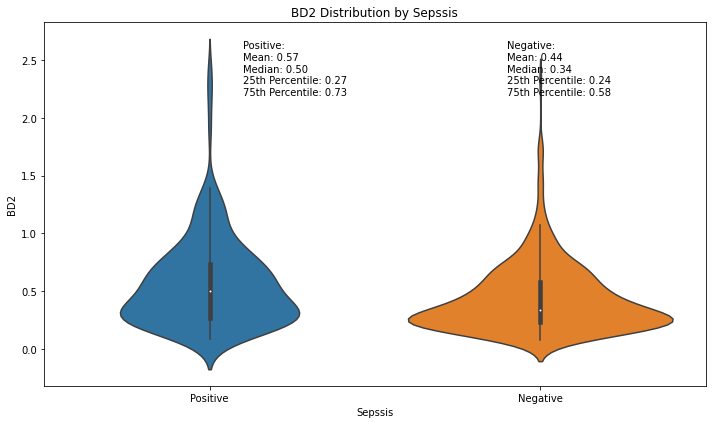

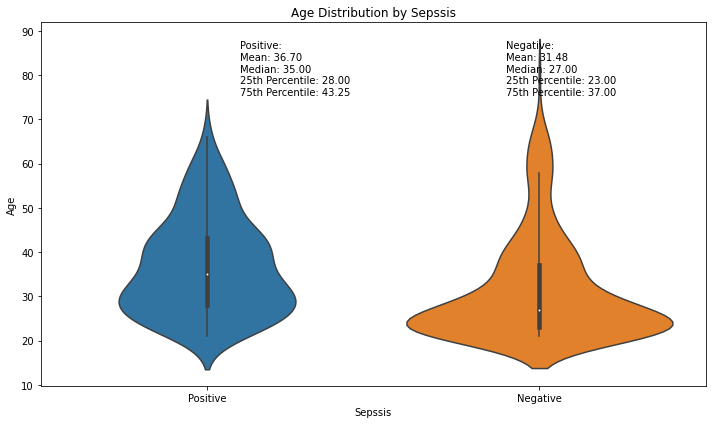

In [17]:
# Numerical Variables - Violin plots with statistics
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')
    
    # Calculate statistics
    positive_vals = df[df['Sepssis'] == 'Positive'][var]
    negative_vals = df[df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }
    
    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes)
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()



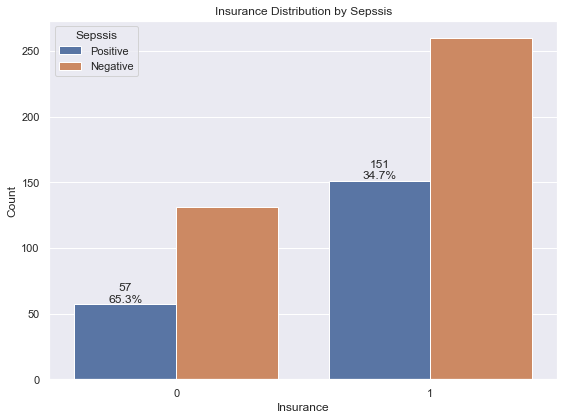

In [23]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Sepssis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(df['Sepssis'])
    percentages = df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [18]:
# Encoding the target variable
df['Sepssis_Encoded'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

# Calculate correlation coefficients
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Print correlation coefficients
for var in numerical_vars:
    correlation = correlations.loc[var, 'Sepssis_Encoded']
    print(f"Pearson correlation between 'Sepssis_Encoded' and '{var}': {correlation:.2f}")


Pearson correlation between 'Sepssis_Encoded' and 'PRG': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'PL': 0.45
Pearson correlation between 'Sepssis_Encoded' and 'PR': 0.06
Pearson correlation between 'Sepssis_Encoded' and 'SK': 0.08
Pearson correlation between 'Sepssis_Encoded' and 'TS': 0.15
Pearson correlation between 'Sepssis_Encoded' and 'M11': 0.32
Pearson correlation between 'Sepssis_Encoded' and 'BD2': 0.18
Pearson correlation between 'Sepssis_Encoded' and 'Age': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'Insurance': 0.06


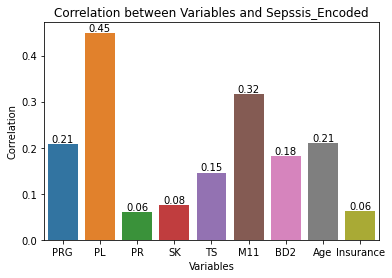

In [19]:
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Get correlation values
correlation_values = correlations.loc[numerical_vars, 'Sepssis_Encoded']

# Create bar plot using Seaborn
sns.barplot(x=numerical_vars, y=correlation_values)

# Add data labels to the bar plot
for i, val in enumerate(correlation_values):
    plt.text(i, val, round(val, 2), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Variables and Sepssis_Encoded')

# Show the plot
plt.show()


Let's analyze the correlations between the 'Sepssis_Encoded' variable and each of the other variables:

1. 'PRG': The correlation coefficient of 0.21 suggests a weak positive correlation between plasma glucose levels and the likelihood of developing sepsis. However, the correlation is not very strong.

2. 'PL': The correlation coefficient of 0.45 indicates a moderate positive correlation between attribute 2 (blood work result-1) and the likelihood of developing sepsis. This suggests that higher values of PL are associated with a higher likelihood of sepsis.

3. 'PR': The correlation coefficient of 0.06 indicates a very weak positive correlation between blood pressure and the likelihood of developing sepsis. The correlation is close to zero, suggesting that there is no meaningful relationship between these variables.

4. 'SK': The correlation coefficient of 0.08 suggests a very weak positive correlation between attribute 4 (blood work result-2) and the likelihood of developing sepsis. The correlation is close to zero, indicating no significant relationship.

5. 'TS': The correlation coefficient of 0.15 indicates a weak positive correlation between attribute 5 (blood work result-3) and the likelihood of developing sepsis. The correlation is not very strong, suggesting a limited relationship.

6. 'M11': The correlation coefficient of 0.32 indicates a moderate positive correlation between body mass index (BMI) and the likelihood of developing sepsis. This suggests that higher BMI values are associated with a higher likelihood of sepsis.

7. 'BD2': The correlation coefficient of 0.18 suggests a weak positive correlation between attribute 7 (blood work result-4) and the likelihood of developing sepsis. The correlation is not very strong, indicating a limited relationship.

8. 'Age': The correlation coefficient of 0.21 suggests a weak positive correlation between age and the likelihood of developing sepsis. This implies that older patients may have a slightly higher likelihood of sepsis.

9. 'Insurance': The correlation coefficient of 0.06 indicates a very weak positive correlation between insurance status and the likelihood of developing sepsis. The correlation is close to zero, suggesting no significant relationship.

###### In summary, the analysis of the correlations suggests that attributes such as PL, M11 (BMI), and age may have a moderate positive correlation with the likelihood of developing sepsis. However, the other variables have either weak or very weak correlations, indicating limited or no meaningful relationship with sepsis development.

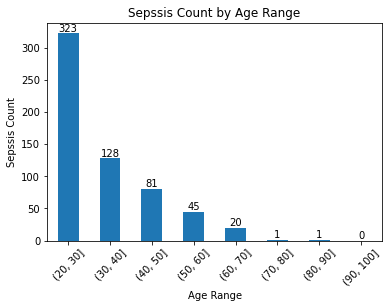

In [20]:
# Assuming your dataset is stored in a DataFrame called 'df'
age_ranges = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
grouped_data = df.groupby(age_ranges)

# Calculate the count of 'Sepssis' for each age range
count_sepsis_by_age = grouped_data['Sepssis'].count()

# Plotting the count of 'Sepssis' for each age range
ax = count_sepsis_by_age.plot(kind='bar', xlabel='Age Range', ylabel='Sepssis Count', title='Sepssis Count by Age Range')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [21]:
count_sepsis_by_age

Age
(20, 30]     323
(30, 40]     128
(40, 50]      81
(50, 60]      45
(60, 70]      20
(70, 80]       1
(80, 90]       1
(90, 100]      0
Name: Sepssis, dtype: int64

The disparity observed in the counts and mean values of sepsis cases by age range suggests that while the age range (20, 30] has the highest count of sepsis cases (323 occurrences), the mean value of sepsis cases within this age range is relatively lower (0.23) compared to other age ranges.

This discrepancy can be attributed to the difference in the population size of each age range. The age range (20, 30] has a larger population size, which results in a higher count of sepsis cases. However, when calculating the mean value, which represents the proportion of sepsis cases within each age range, the percentage of sepsis cases within the (20, 30] age range is relatively lower compared to other age ranges.

In other words, while the count of sepsis cases in the (20, 30] age range is high, the proportion of sepsis cases within that age range is relatively lower compared to other age ranges such as (40, 50], (50, 60], and (30, 40].

# Multivariate Analysis

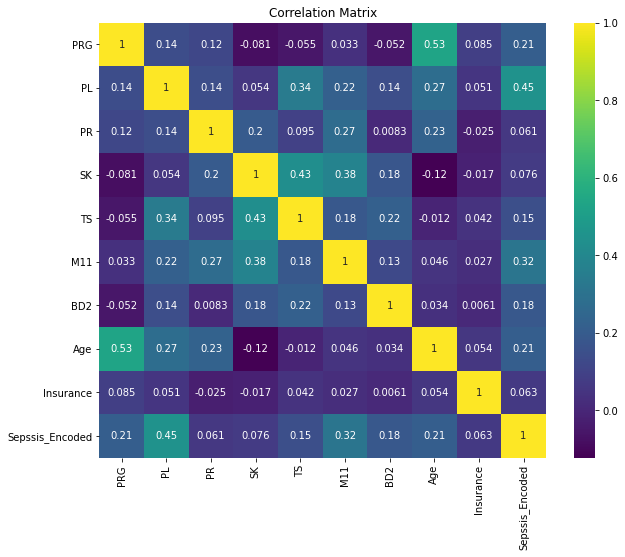

In [22]:
# Calculate correlation matrix
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

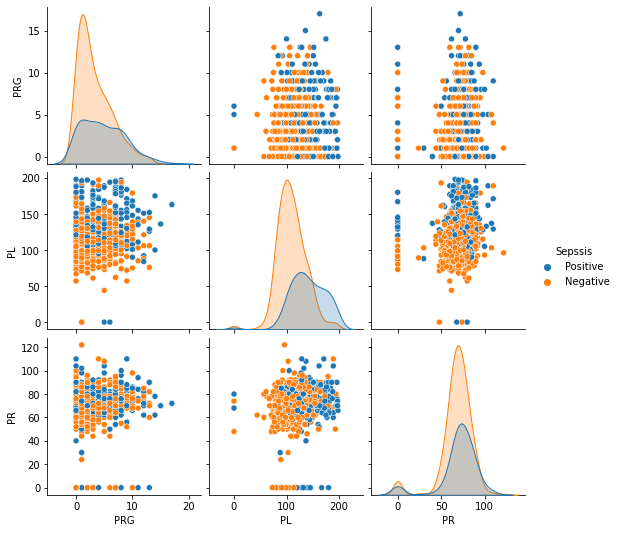

In [23]:
numerical_vars = ['PRG', 'PL', 'PR']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

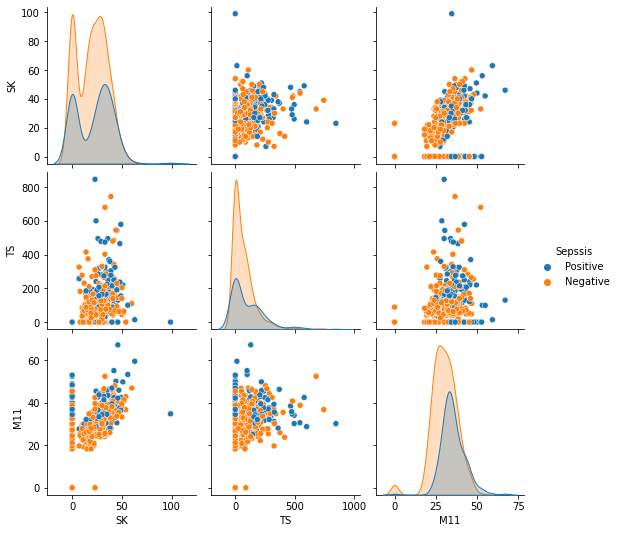

In [24]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

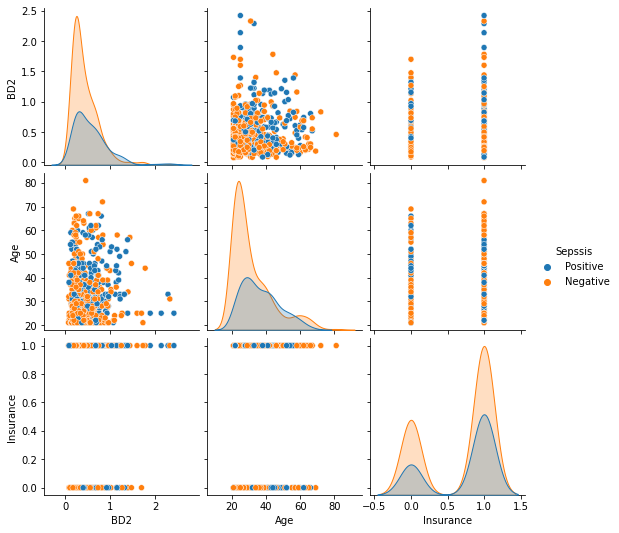

In [25]:
numerical_vars = ['BD2', 'Age', 'Insurance']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

Hypothesis
- Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.
- Null Hypothesis: There is no association between higher plasma glucose levels (PRG) and the risk of developing sepsis.

- Alternate Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

In [26]:
grouped_data = df.groupby('Sepssis')

positive_group = grouped_data.get_group('Positive')
negative_group = grouped_data.get_group('Negative')

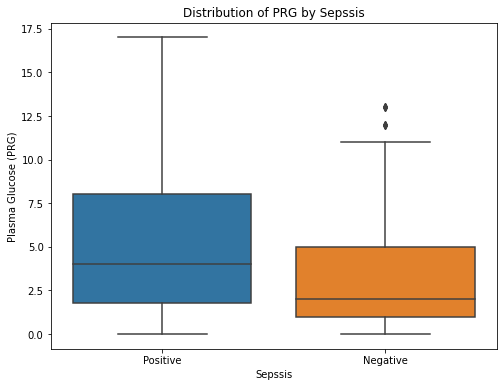

Positive Group:
Mean PRG: 4.778846153846154
Median PRG: 4.0
Standard Deviation: 3.7557215116186895

Negative Group:
Mean PRG: 3.317135549872123
Median PRG: 2.0
Standard Deviation: 3.0181821629514967

T-Statistic: 5.172721512358376
P-Value: 3.154172341568826e-07


In [27]:
# Compare PRG distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='PRG')
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose (PRG)')
plt.title('Distribution of PRG by Sepssis')
plt.show()

# Calculate summary statistics
positive_prg = positive_group['PRG']
negative_prg = negative_group['PRG']

positive_mean = positive_prg.mean()
positive_median = positive_prg.median()
positive_std = positive_prg.std()

negative_mean = negative_prg.mean()
negative_median = negative_prg.median()
negative_std = negative_prg.std()

print('Positive Group:')
print('Mean PRG:', positive_mean)
print('Median PRG:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean PRG:', negative_mean)
print('Median PRG:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_prg, negative_prg)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


# Feature Engineering 

## Data Imbalance Check

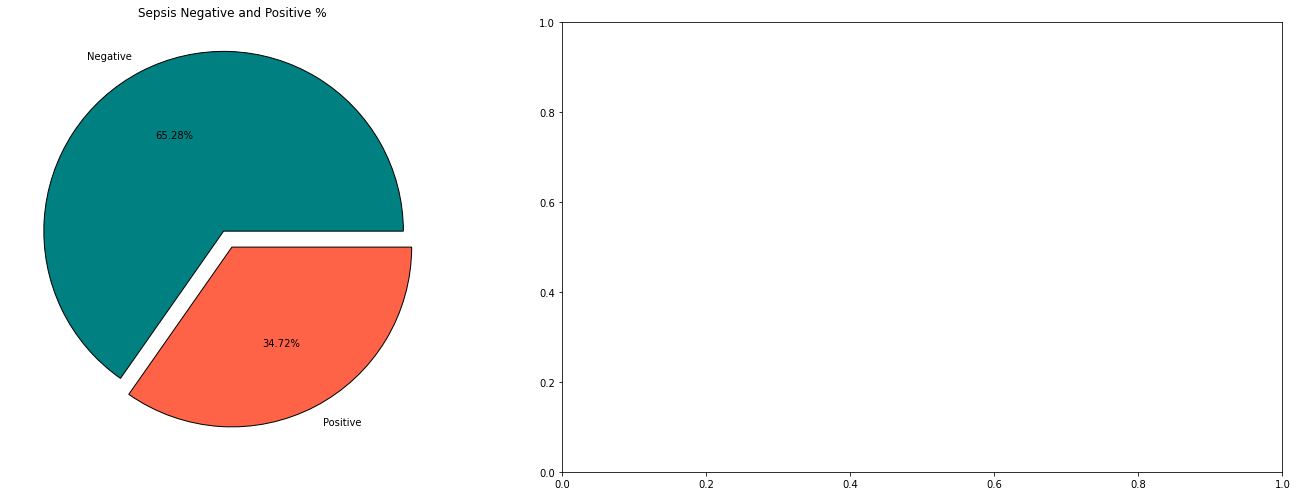

In [28]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
sepsis_counts = df['Sepssis'].value_counts()
pie_values = [sepsis_counts[0] / sepsis_counts.sum() * 100, sepsis_counts[1] / sepsis_counts.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(pie_values, labels=['Negative', 'Positive'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Sepsis Negative and Positive %')

# Plot the countplot on the second subplot
#sns.countplot(data=df, x='Sepssis', palette=palette[:2], edgecolor='black', ax=axes[1])
#axes[1].set_xticklabels(['Positive', 'Negative'])
#axes[1].set_title('Sepsis and Negative')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Drop Duplicates

In [29]:
def check_duplicate_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

In [30]:
# Check duplicate rows in train data
check_duplicate_rows(sepsis_train)

# Check duplicate rows in test data
check_duplicate_rows(sepsis_test)

Number of duplicate rows: 0
Number of duplicate rows: 0


# Impute Missing Values

In [31]:
def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Missing values:\n", missing_values)

In [32]:
# Check missing values in train data
check_missing_values(sepsis_train)

# Check missing values in test data
check_missing_values(sepsis_test)

Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64
Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


# Features Encoding

In [33]:
def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

    # Combine the features and the encoded target variable
    data_encoded = pd.concat([data.iloc[:, :-1], target_encoded], axis=1)
    data_encoded.drop('ID', axis=1, inplace=True)

    return data_encoded

In [34]:
# Encode target variable in train data
train_encoded = encode_target_variable(sepsis_train, 'Sepssis')

# Print the encoded train data
print(train_encoded.head())

   PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0    6  148  72  35    0  33.6  0.627   50          0        1
1    1   85  66  29    0  26.6  0.351   31          0        0
2    8  183  64   0    0  23.3  0.672   32          1        1
3    1   89  66  23   94  28.1  0.167   21          1        0
4    0  137  40  35  168  43.1  2.288   33          1        1


In [35]:
sepsis_test.drop('ID',axis=1,inplace=True)

# spliting the dataset

In [36]:
def split_data(X, y, test_size, random_state=42, stratify=None):
    # Split the data into train and validation sets
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

    return X_train, X_eval, y_train, y_eval

In [37]:
# Split the data into train and validation sets for both X and y
X_train, X_eval, y_train, y_eval = split_data(train_encoded.iloc[:, :-1], train_encoded.iloc[:, -1:], test_size=0.2, random_state=42, stratify=train_encoded.iloc[:, -1:])

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (479, 9)
y_train shape: (479, 1)
X_eval shape: (120, 9)
y_eval shape: (120, 1)


# Imputting Missing Values

In [38]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")

numerical_imputer.fit(X_train)

X_train_imputed = numerical_imputer.transform(X_train)
X_eval_imputed = numerical_imputer.transform(X_eval)
X_test_imputed = numerical_imputer.transform(sepsis_test)

# feature scaling 

In [39]:
scaler = StandardScaler()
scaler.fit(X_train_imputed)

columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']

def scale_data(data, scaler, columns):
    scaled_data = scaler.transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=columns)
    return scaled_df

In [40]:
# Scale the data
X_train_df = scale_data(X_train_imputed, scaler, columns)
X_eval_df = scale_data(X_eval_imputed, scaler, columns)
X_test = scale_data(X_test_imputed, scaler, columns)

## Machine Learning Modeling
Here is the section to build, train, evaluate and compare the models to each others.

- Linear regression


In [41]:
def logistic_regression_model(X_train, y_train, X_eval, y_eval):
    # Fit logistic regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    lr_preds = lr_model.predict(X_eval)

    # Calculate F1 score
    lr_f1_score = f1_score(y_eval, lr_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, lr_preds)

    # Calculate AUC score
    lr_auc_score = roc_auc_score(y_eval, lr_preds)

    return lr_model, lr_preds, lr_f1_score, fpr, tpr, thresholds, lr_auc_score

In [42]:
# Call the function and get the outputs
lr_model, lr_preds, lr_f1_score, fpr, tpr, thresholds, lr_auc_score = logistic_regression_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", lr_f1_score)
print("AUC Score:", lr_auc_score)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


F1 Score: 0.6265060240963854
AUC Score: 0.7133699633699634


In [ ]:
print(confusion_matrix(y_test, prediction_test))
print ('Accuracy Score:', metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

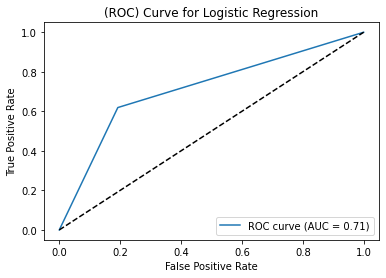

In [43]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % lr_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Decision trees

In [44]:
def evaluate_decision_tree(X_train, y_train, X_eval, y_eval):
    # Create and fit the decision tree classifier model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    dt_pred = dt_model.predict(X_eval)

    # Calculate the F1 score
    dt_f1_score = f1_score(y_eval, dt_pred)

    # Calculate the false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, dt_pred)

    # Calculate the AUC (Area Under the Curve)
    dt_auc_score = roc_auc_score(y_eval, dt_pred)
    return dt_model, dt_pred, dt_f1_score, dt_auc_score

In [45]:
# Call the function with your train and evaluation data
dt_model, dt_pred, dt_f1_score, dt_auc_score = evaluate_decision_tree(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", dt_f1_score)
print("AUC Score:", dt_auc_score)

F1 Score: 0.6024096385542169
AUC Score: 0.6950549450549451


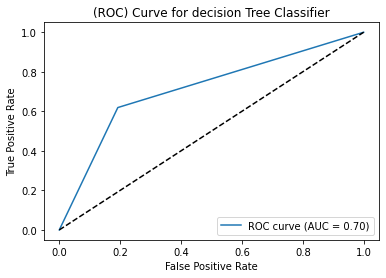

In [46]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [47]:
def random_forest_model(X_train, y_train, X_eval, y_eval):
    # Fit Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    rf_preds = rf_model.predict(X_eval)

    # Calculate F1 score
    rf_f1_score = f1_score(y_eval, rf_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, rf_preds)

    # Calculate AUC score
    rf_auc_score = roc_auc_score(y_eval, rf_preds)

    return rf_model, rf_preds, rf_f1_score, fpr, tpr, thresholds, rf_auc_score

In [48]:
rf_model, rf_preds, rf_f1_score, fpr, tpr, thresholds, rf_auc_score = random_forest_model(X_train, y_train, X_eval, y_eval)

print("F1 Score:", rf_f1_score)
print("AUC Score:", rf_auc_score)

F1 Score: 0.5783132530120483
AUC Score: 0.6767399267399268


<ipython-input-47-90940c6b3a37>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


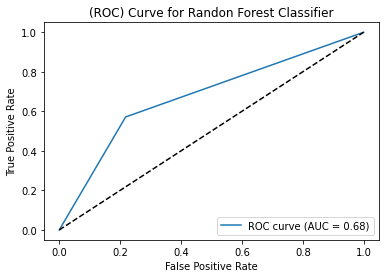

In [49]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % rf_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Randon Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# XGBClassifier

In [50]:
def xgboost_model(X_train, y_train, X_eval, y_eval):
    # Fit XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    xgb_preds = xgb_model.predict(X_eval)

    # Calculate F1 score
    xgb_f1_score = f1_score(y_eval, xgb_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, xgb_preds)

    # Calculate AUC score
    xgb_auc_score = roc_auc_score(y_eval, xgb_preds)

    return xgb_model, xgb_preds, xgb_f1_score, fpr, tpr, thresholds, xgb_auc_score

In [51]:
xgb_model, xgb_preds, xgb_f1_score, fpr, tpr, thresholds, xgb_auc_score = xgboost_model(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on XGBoost:", xgb_f1_score)
print("AUC Score on Evaluation Set based on XGBoost:", xgb_auc_score)

F1 Score on Evaluation Set based on XGBoost: 0.5365853658536585
AUC Score on Evaluation Set based on XGBoost: 0.6465201465201464


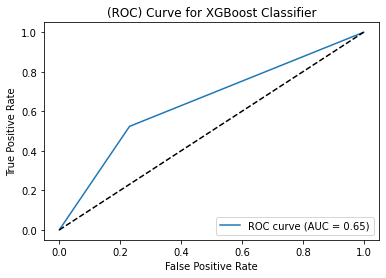

In [52]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % xgb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes model

In [53]:
def naive_bayes_model(X_train, y_train, X_eval, y_eval):
    # Fit Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    nb_preds = nb_model.predict(X_eval)

    # Calculate F1 score
    nb_f1_score = f1_score(y_eval, nb_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, nb_preds)

    # Calculate AUC score
    nb_auc_score = roc_auc_score(y_eval, nb_preds)

    return nb_model, nb_preds, nb_f1_score, fpr, tpr, thresholds, nb_auc_score

In [54]:
nb_model, nb_preds, nb_f1_score, fpr, tpr, thresholds, nb_auc_score = naive_bayes_model(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on Naive Bayes:", nb_f1_score)
print("AUC Score on Evaluation Set based on Naive Bayes:", nb_auc_score)

F1 Score on Evaluation Set based on Naive Bayes: 0.574712643678161
AUC Score on Evaluation Set based on Naive Bayes: 0.6694139194139194


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


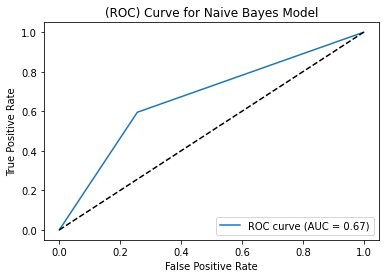

In [55]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % nb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()

# Stochastic Grad Descent

In [56]:
def sgd_model_func(X_train, y_train, X_eval, y_eval):
    # Fit SGD model
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    sgd_preds = sgd_model.predict(X_eval)

    # Calculate F1 score
    sgd_f1_score = f1_score(y_eval, sgd_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, sgd_preds)

    # Calculate AUC score
    sgd_auc_score = roc_auc_score(y_eval, sgd_preds)

    return sgd_model, sgd_preds, sgd_f1_score, fpr, tpr, thresholds, sgd_auc_score

In [57]:
sgd_model, sgd_preds, sgd_f1_score, fpr, tpr, thresholds, sgd_auc_score = sgd_model_func(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on SGD:", sgd_f1_score)
print("AUC Score on Evaluation Set based on SGD:", sgd_auc_score)

F1 Score on Evaluation Set based on SGD: 0.5894736842105263
AUC Score on Evaluation Set based on SGD: 0.6730769230769231


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


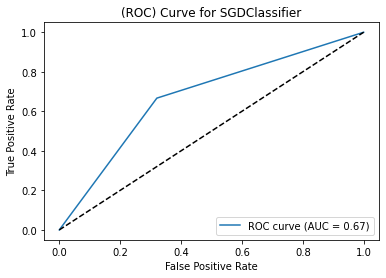

In [58]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % sgd_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for SGDClassifier')
plt.legend(loc='lower right')
plt.show()

# Summary of the results

In [59]:
results_No_SMOTE= {'model':['Decision Tree','Random Forest','XGBoost','Logistic Regression','Naive Bayes','SGBoost'],
         'f1_score':[dt_f1_score,rf_f1_score,xgb_f1_score,lr_f1_score,nb_f1_score,sgd_f1_score],
         'AUC_score':[dt_auc_score,rf_auc_score,xgb_auc_score,lr_auc_score,nb_auc_score,sgd_auc_score]}

results_No_SMOTE_df= pd.DataFrame(results_No_SMOTE)
results_No_SMOTE_df_sorted = results_No_SMOTE_df.sort_values(by= 'AUC_score', ascending = False)
results_No_SMOTE_df_sorted

,model,f1_score,AUC_score
3,Logistic Regression,0.626506,0.713370
0,Decision Tree,0.602410,0.695055
1,Random Forest,0.578313,0.676740
5,SGBoost,0.589474,0.673077
4,Naive Bayes,0.574713,0.669414
2,XGBoost,0.536585,0.646520


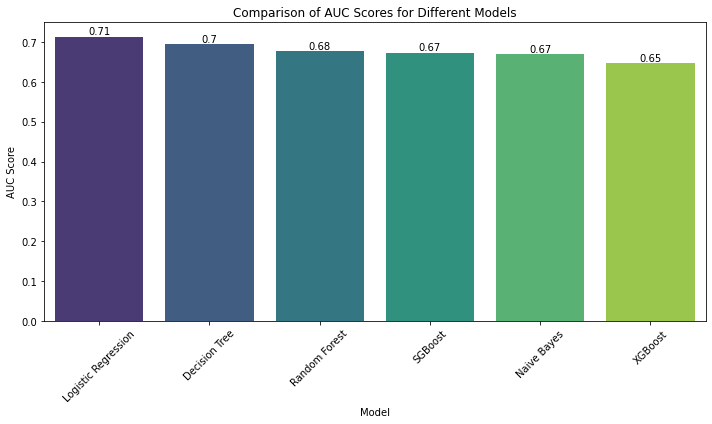

In [60]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_No_SMOTE_df_sorted, x='model', y='AUC_score', palette='viridis')

# Add data labels
for i, value in enumerate(results_No_SMOTE_df_sorted['AUC_score']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

# Set other plot properties
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.tight_layout()
plt.show()

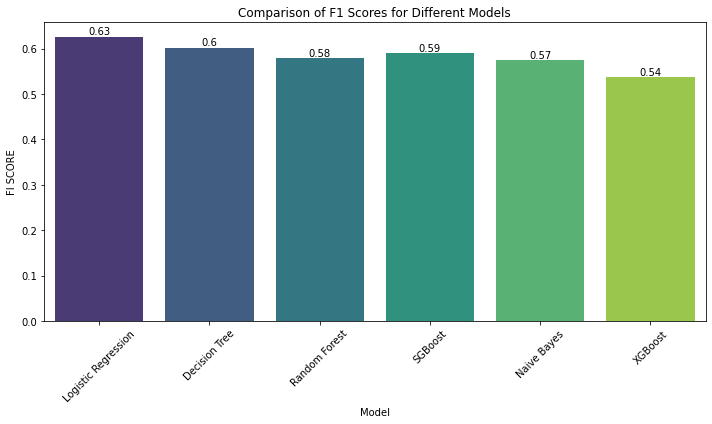

In [68]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_No_SMOTE_df_sorted, x='model', y='f1_score', palette='viridis')

# Add data labels
for i, value in enumerate(results_No_SMOTE_df_sorted['f1_score']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

# Set other plot properties
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('FI SCORE')
plt.title('Comparison of F1 Scores for Different Models')
plt.tight_layout()
plt.show()

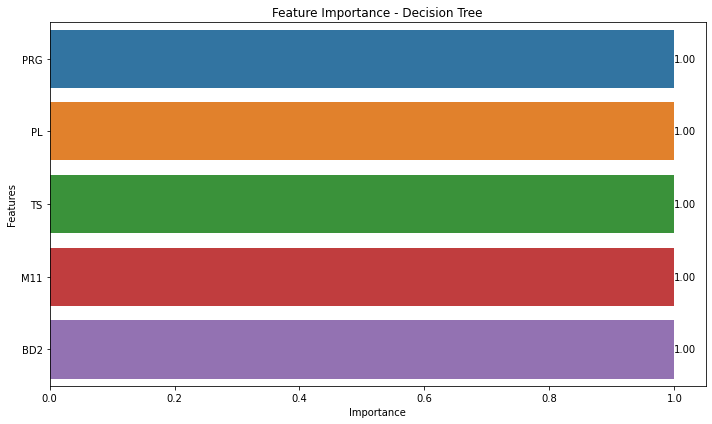

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

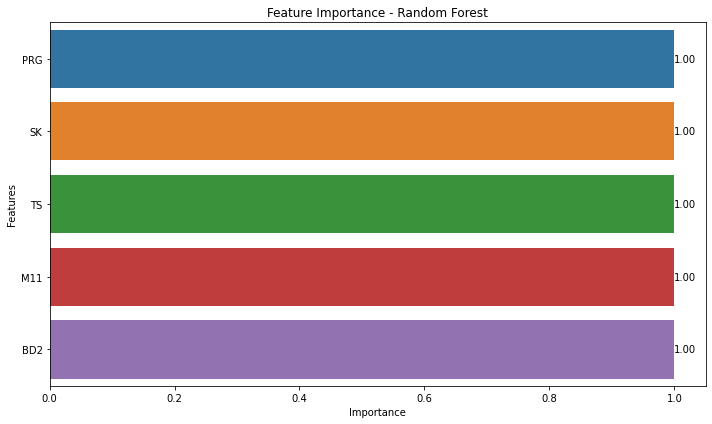

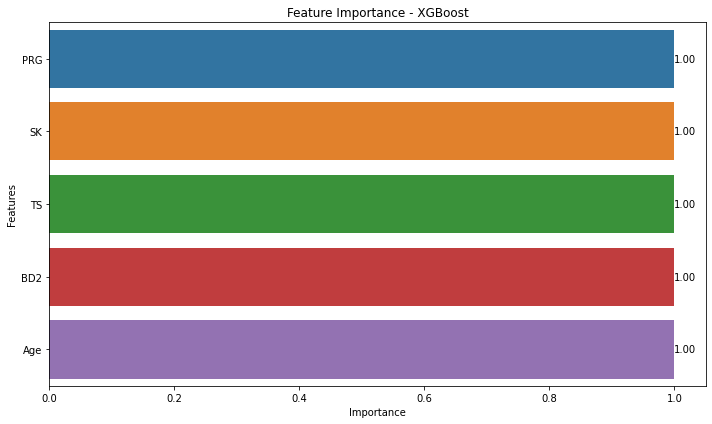

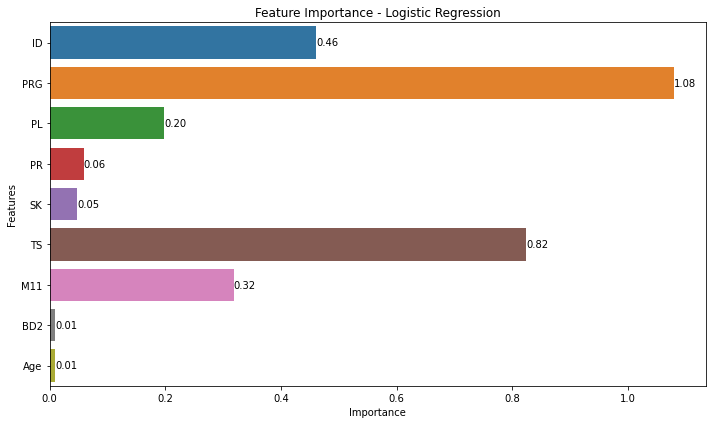

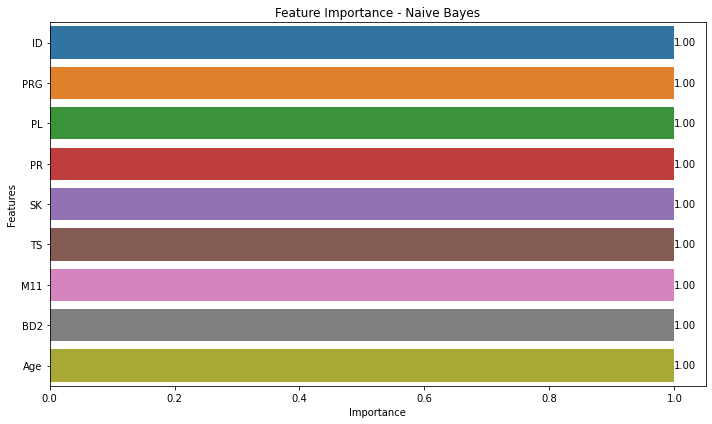

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

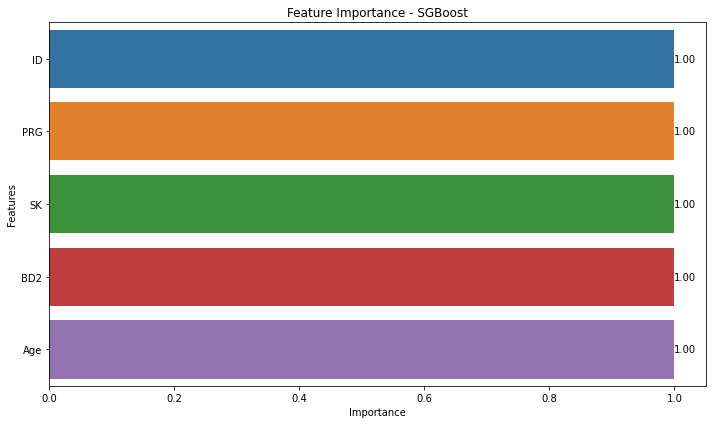

In [61]:
def get_feature_importance(model, X_train_df, y_train, num_features):
    if isinstance(model, LogisticRegression):
        # For logistic regression, use the coefficients as feature importance
        importances = np.abs(model.coef_[0])
    elif isinstance(model, GaussianNB):
        # For Naive Bayes, use feature variances as importance
        importances = np.var(X_train_df, axis=0)
    else:
        # For other models, use RFE for feature importance
        rfe = RFE(model, n_features_to_select=num_features)
        rfe.fit(X_train_df, y_train)
        importances = rfe.support_
    
    return importances

# Assuming you have the trained models available
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'SGBoost': sgd_model
}

# Define the number of features you want to select
num_features = 5

# Iterate over each model and display feature importance
for model_name, model in models.items():
    importances = get_feature_importance(model, X_train_df, y_train, num_features)
    features = df.columns

    # Get the indices of the selected features
    indices = np.where(importances)[0]

    # Plotting feature importances using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()

    # Add data labels to the bar plot
    for i, v in enumerate(importances[indices]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')

    plt.show()


# Export components

Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [64]:
# Get the current working directory
cwd = os.getcwd()

# Specify the relative path to the destination directory
destination = os.path.join(cwd, "Assets")

# Create the "export" directory if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Export the numerical imputer
imputer_filepath = os.path.join(destination, "numerical_imputer.joblib")
dump(numerical_imputer, imputer_filepath)

# Export the scaler
scaler_filepath = os.path.join(destination, "scaler.joblib")
dump(scaler, scaler_filepath)

# Export the logistic regression model
model_filepath = os.path.join(destination, "lr_model.joblib")
dump(lr_model, model_filepath)

# Print the paths to the exported components
print(f"Numerical Imputer exported to: {imputer_filepath}")
print(f"Scaler exported to: {scaler_filepath}")
print(f"Logistic Regression Model exported to: {model_filepath}")


Numerical Imputer exported to: C:\Users\user\Desktop\AZUBI AFRICA\SecondPhase\P6_FastAPI\Assets\numerical_imputer.joblib
Scaler exported to: C:\Users\user\Desktop\AZUBI AFRICA\SecondPhase\P6_FastAPI\Assets\scaler.joblib
Logistic Regression Model exported to: C:\Users\user\Desktop\AZUBI AFRICA\SecondPhase\P6_FastAPI\Assets\lr_model.joblib


In [65]:
!pip list --format=freeze >Assets/requirements.txt

# Add small note please for explanation

In [22]:
boolean_df=sepsis_train[["Insurance","Sepssis"]].groupby(by=["Insurance","Sepssis"]).size().unstack(fill_value=0)
boolean_df=pd.DataFrame({"Sep_Negative":boolean_df["Negative"],"Sep_Positive":boolean_df["Positive"]})
boolean_df

,Sep_Negative,Sep_Positive
Insurance,,
0,131,57
1,260,151


# Add small note please for explanation

In [23]:
 boolean_df["Sep_Positive%"]=np.round(boolean_df["Sep_Positive"]*100/(boolean_df["Sep_Positive"]+boolean_df["Sep_Negative"]),2)
boolean_df

,Sep_Negative,Sep_Positive,Sep_Positive%
Insurance,,,
0,131,57,30.32
1,260,151,36.74


# Add small note please for explanation

In [24]:
fig=px.bar(boolean_df[["Sep_Negative","Sep_Positive"]])
fig.show()

# Add small note please for explanation